<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285 - Computación Científica I / INF285 - Computación Científica</h1>
    <h1> Tarea 1: Remember your roots </h1>
    <h3> Sebastián Torrico - sebastian.torrico.12@sansano.usm.cl - 201330061-8</h3>
    <h3> [S]cientific [C]omputing [T]eam 2019</h3>
</center>
<p>
<center>Marzo 2019 - v1.25 </center>
</p>

---

## Contexto

La presente tarea tiene como objetivo el uso de algoritmos de búsquedas de ceros en 1D, como adaptarlos a un problema particular y que implicancias tiene el uso de cada uno, tanto desde el punto de vista de la aproximación de la solución como de la computación necesaria. Al final se presenta la interpretación gráfica de las soluciones obtenidas.

_Nota: En esta tarea no se puede utilizar ```sympy``` en los algoritmos numéricos, pero sí se puede utilizar para desarrollos intermedios, por ejemplo en la sección "1.- Construcción"._

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets
import sympy as sym

-------

## Problema

El universo de Marvel fue atacado duramente por Thanos en _Avenger Infinity War_. 
Sin embargo, los Avengers en conjunto con la Capitana Marvel tienen un plan para salvar al universo.
Lamentablemente, se han encontrado con la siguiente ecuación diferencial ordinaria que no pueden resolver:

\begin{align*}
\frac{dy}{dx}(x)&=y(x)\cos{(x+y(x))},\\
y(0)&=1,
\end{align*}

donde $x \in [0,100]$ y además sabemos que $-1000\leq y(x) \leq 1000$ para $x \in [0,100]$.
Afortunadamente, usted se ha dado cuenta que puede usar algoritmos numéricos para encontrar una aproximación numérica de $y(x)$ sobre una grilla de puntos $x_i=100\frac{i}{M}$, con $i\in\{0,1,\dots,M\}$.
Una estrategia para resolver este tipo de problemas es discretizar el dominio de la función, y en lugar de encontrar la función $y(x)$ algebraicamente, se encuentra una aproximación a $y(x_i)$ para cada $x_i$.

Note que ya conocemos el valor exacto de $y(x_0)=y(0)=1$ por la condición inicial, por lo que necesitamos obtener el siguiente valor $y(x_1)$ y así sucesivamente hasta $y(x_M)$.
Para hacer esto, primero hagamos un poco de desarrollo algebraico. 
Al integrar la ecuación diferencial entre $x_0$ y $x_1$ obtenemos:

\begin{equation*}
\int_{x_0}^{x_1} \dfrac{dy}{dx}(x) \, \mathrm{d}x  =  \int_{x_0}^{x_1} y(x)\,\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Por el **teorema fundamental del cálculo**, esto es:

\begin{equation*}
 y(x_1)- y(x_0)   =  \int_{x_0}^{x_1} \! y(x)\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Hasta este punto no se ha realizado ninguna aproximación.
Nótese que $y(x_1)$ es lo que buscamos y $y(x_0)$ es conocido, asi que vamos bien encaminados. 
Sin embargo necesitamos $y(x)$ para realizar la integral del lado derecho de la ecuación.
Entonces, ahora es un buen momento para realizar una aproximación numérica.
En este caso, utilizaremos el método de integración de trapecio.
Este consiste en que una integral definida $\int_a^b\,f(x)\,\mathrm{d}x$ es obtenida por medio de la siguiente expresión $\dfrac{f(a)+f(b)}{2}(b-a)+\text{Error}$, i.e. $\int_a^b\,f(x)\,\mathrm{d}x\approx\dfrac{f(a)+f(b)}{2}(b-a)$.
En la siguiente figura se muestra un sketch de la aproximación:

<img src="Trapezoidal-Rule.png" style="width:50%">

donde la función a integrar es la curva en rojo, el valor de la integral, en este caso, corresponde al área bajo la curva en gris, la aproximación de la integral $\int_a^b\,f(x)\,\mathrm{d}x$ por medio de un trapecio es la área achurada en celeste y el Error es la diferencia entre en valor de la integral y la aproximación por trapecio. 
Por ahora solo es necesario entender que el Error _debería_ disminuir a medida que el largo del intervalo $[a,b]$ sea más pequeño. Entonces, en nuestro caso esto se reduce a:

\begin{equation*}
 y(x_1)- y(x_0)   \approx  \dfrac{x_1-x_0}{2}\left(y(x_1)\cos{(x_1+y(x_1))}+y(x_0)\cos{(x_0+y(x_0))}\right).
\end{equation*}

Lo que se transforma en el siguiente método numérico:

\begin{equation*}
 y_1- y_0   =  \dfrac{x_1-x_0}{2}\left(y_1\cos{(x_1+y_1)}+y_0\cos{(x_0+y_0)}\right),
\end{equation*}

donde lo conocido es $x_0$, $x_1$ y $y_0$ y lo que se busca es $y_1$. En el caso general, obtenemos
la siguiente secuencia de ecuaciones que se deben resolver:

\begin{equation*}
 y_{i+1}- y_i   =  \dfrac{x_{i+1}-x_i}{2}\left(y_{i+1}\cos{(x_{i+1}+y_{i+1})}+y_i\cos{(x_i+y_i)}\right),
\end{equation*}

para $i\in\{0,1,\dots,M\}$, $x_i=100\frac{i}{M}$ y $y_0=1$. _Con esta solución, los Avengers y la capitana Marvel tendrán todas la herramientas para derrotar a Thanos!_

**Note: From now on $M$ will be denoted as $M\_$intervals in the code.**

----

## Preguntas
---

# 1.- Construcción
Explique cómo usar los tres métodos de búsqueda de raíces vistos en clases (bisección, iteración de punto fijo y método de Newton) para resolver la secuencia de problemas mencionados anteriormente.
Debe explicitar completamente todo lo que necesita para luego poder implementar cada método.
Sea claro y explícito en su estrategia. Se indicará en cada método lo mínimo que debe explicar.
Ver [04_roots_of_1D_equations.ipynb](https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb) para referencia.

- Método de la Bisección. Debe escribir explícitamente cual es la función 'f' a utilizar y los intervalos $[a,b]$ a utilizar. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 

Para utilizar el Método de la Bisección es necesario tener una función y un intervalo asociado a este. En este caso se tiene una secuencia de ecuaciones a resolver, por lo que, hay que trabajar la función para obtener una forma general y una estrategia para los intervalos en cada problema.

Tomando el caso general para la secuencia de ecuaciones:

\begin{equation*}
 y_{i+1}- y_i   =  \dfrac{x_{i+1}-x_i}{2}\left(y_{i+1}\cos{(x_{i+1}+y_{i+1})}+y_i\cos{(x_i+y_i)}\right),
\end{equation*}

Remplazando $x_i=100\frac{i}{M}$ en la ecuación y re-ordenando los elementos se tiene que:

\begin{equation*}
 \dfrac{50}{M}\left(y_{i+1}\cos{(\frac{100(i+1)}{M} + y_{i+1})}+y_i\cos{(\frac{100i}{M} + y_{i+1})}\right) - y_{i+1} + y_{i}   =  0
\end{equation*}

Entonces la función a utilizar queda como:

\begin{equation*}
 f(y_{i+1}) = \dfrac{50}{M}\left(y_{i+1}\cos{(\frac{100(i+1)}{M} + y_{i+1})}+y_i\cos{(\frac{100i}{M} + y_{i+1})}\right) - y_{i+1} + y_{i}
\end{equation*}

Sin embargo, para poder aplicar el Método de la Bisección se necesita un intervalo y puede que este no sea el mismo para cada caso; por tanto, hay que obtener un intervalo para cada caso en la secuencia. Lo importante es que cada intervalo tipo $[a, b]$ cumpla con la siguiente condición: 

\begin{equation*}
 f(a) * f(b) < 0
\end{equation*}

Una estrategia es encontrar directamente un intervalo de tipo $[-x, x]$ que satisfaga la condición anterior para cada ecuación. 
Para ello se usarán funciones de numpy. La idea es crear un arreglo con el dominio de $x$ (0 a 100), lo que se puede lograr con la función "arange" y utilizar "argmax" para encontrar instantáneamente el mínimo valor que permita aplicar bisección. La ventaja de esto es que no es necesario tener que probar cada elemento. $[2]$ 

In [2]:
#Definición de variables del primer caso de la ecuación para determinar y_1
i = 0
y_0 = 1
M = 1000

#Función a utilizar en los distintos métodos.
f = lambda y: (50/(M)) * (y*(np.cos(100*(i+1)/M + y)) + y_0 * (np.cos(100 * i/M + y_0))) -y + y_0

#Creación de arreglo con los valores de x sin discretizar
x = np.arange(0, 100)

#Mínimo valor que permite realizar el Método de Bisección para el primer caso, según la condición definida en el algoritmo
val = np.argmax(f(x) * f(-x) < 0)

#Intervalo encontrado
print("[",-val,",",val,"]")

[ -2 , 2 ]


Por tanto, el intervalo encontrado es el mínimo valor del arreglo que permite poder realizar la bisección y cumplir con la condición. En otras palabras lo que se hace es tomar el dominio de la EDO sin discretizar y encontrar el primer intervalo en donde la función corte el eje $y_{i+1}$ (de la nueva función igualada a cero). Como el método consiste en dividir en subintervalos, debe haber definitivamente un rango en donde se pueda realizar bisección sin tener que iterar todas las posibilidades para encontrarlo.

- Iteración de Punto Fijo (Restricción: Aquí no se puede usar el método de Newton). Explique cual será su _initial guess_ y la función 'g' a utilizar. Se espera que sea convergente. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 

Para encontrar la solución de una ecuación utilizando este método es necesario definir una función $g$ tal que $x = g(x)$. Entonces, la idea es encontrar una solución a una función de forma $f(x) = g(x) - x$ mientras se itera $g(x)$.

Tomando la función $f(y_{i+1})$ definida en el punto anterior:

\begin{equation*}
 f(y_{i+1}) = \dfrac{50}{M}\left(y_{i+1}\cos{(\frac{100(i+1)}{M} + y_{i+1})}+y_i\cos{(\frac{100i}{M} + y_{i+1})}\right) - y_{i+1} + y_{i}
\end{equation*}

Basta con cumplir:

\begin{equation*}
 f(y_{i+1}) = g(y_{i+1}) - y_{i+1}
\end{equation*}

Por tanto, $g(y_{i+1})$ quedaría definida como:

\begin{equation*}
 g(y_{i+1}) = \dfrac{50}{M}\left(y_{i+1}\cos{(\frac{100(i+1)}{M} + y_{i+1})}+y_i\cos{(\frac{100i}{M} + y_{i+1})}\right) + y_{i}
\end{equation*}

Por otra parte, para determinar un _initial guess_ se esperaría encontrar un valor cercano que hiciera que $f(y_{i+1}) = 0$. Para ello, evaluando $f(y_{1})$:

\begin{equation*}
 f(y_{1}) = \dfrac{50}{M}\left(y_{1}\cos{(\frac{100}{M} + y_{1})}+\cos{(y_{1})}\right) -y_1 + 1 = 0
\end{equation*}

Como la función depende de M, se puede facilitar la evaluación graficando el caso para encontrar un valor aproximado para que $f(y_1) = 0$.

In [3]:
#Gráfica para encontrar un valor aproximado para que f(y_1) = 0
def plot_for_initial_guess(M_intervals=10):
    y_1 = np.linspace(0,10,M_intervals+1)
    fy = (50/M_intervals) * (y_1*np.cos((100/M_intervals) + y_1) + np.cos(y_1)) - y_1 + 1
    plt.figure(figsize=(8,8))
    plt.plot(y_1,fy,'b-',label='f(y_1)')
    plt.legend(loc='best')
    plt.title('Grafica de f(y_1) en un intervalo variable M_intervals')
    plt.grid(True)
    plt.show()
    
interact(plot_for_initial_guess,M_intervals=(100,1000,100))

interactive(children=(IntSlider(value=100, description='M_intervals', max=1000, min=100, step=100), Output()),…

<function __main__.plot_for_initial_guess(M_intervals=10)>

Observando el gráfico anterior es posible notar que el valor de $y_1$ para encontrar una raiz a la ecuación es cercano a 1. Por otra parte, la EDO del enunciado depende de cosenos y sumas, por lo que sus valores deben oscilar entre 0 y 1. Entonces, un _initial guess_ apropiado para utilizar en todas las ecuaciones es $x_0 = 0.5$.  

Para demostrar su convergencia se puede utilizar el Diagrama de Cobweb y la definición de Iteración de Punto Fijo explicados en el notebook de referencia del profesor $[1]$.

In [4]:
#Definición de función para gráficar el Diagrama de Cobweb, obtenido desde el notebook de referencia.
def cobweb(x,g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

In [5]:
#Defición algoritmo Iteración de Punto Fijo, obtenido desde el notebook de referencia.
def fpi(g, x0, k, flag_cobweb=False):
    x = np.empty(k+1)
    x[0] = x0
    error_i = np.inf
    
    for i in range(k):
        x[i+1] = g(x[i])
        error_iminus1 = error_i
        error_i = abs(x[i+1]-x[i])

    if flag_cobweb:
        cobweb(x,g)
    return x[-1]

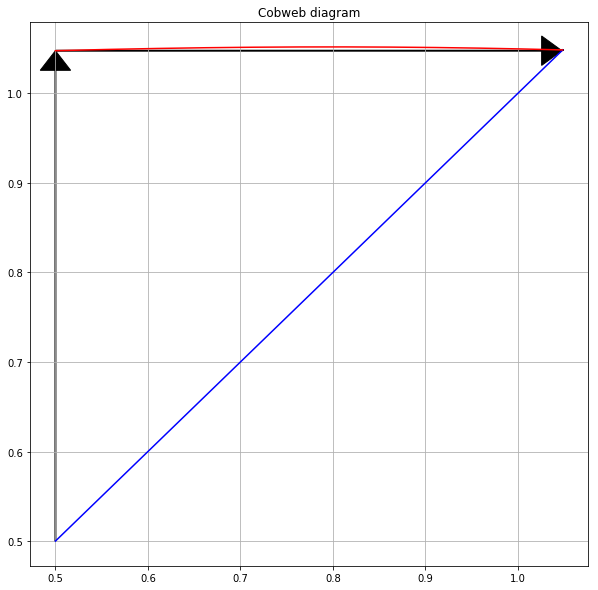

1.0485017742527833

In [6]:
#Evaluación de fpi con g(y_i) definido anteriormente. Se utilizará el primer caso para su evaluación, con 1000 particiones.
i = 0
y_0 = 1
M = 1000
g = lambda y: (50/(M)) * (y*(np.cos(100*(i+1)/M + y)) + y_0 * (np.cos(100 * i/M + y_0))) + y_0
fpi(g, 0.5, 10, True)

Finalmente se determina y se ilustra que la función g determinada anteriormente converge. Además se obtiene el valor de $y_1$ mediante Iteración de Punto Fijo, obteniendo un valor de $y_1 \approx 1.0485$, lo cual demuestra que el _initial guess_ utilizado es suficiente.

- Método de Newton. Debe explicar cual es el 'f', su derivada y el _initial guess_ a usar. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 

La implementación del Método de Newton depende de varios elementos; los más importantes son definir la función $f$ y su derivada $f'$. Además, es importante obtener su multiplicidad y un _initial guess_.

Al igual que en los métodos anteriores se utilizará la misma función $f$:

\begin{equation*}
 f(y_{i+1}) = \dfrac{50}{M}\left(y_{i+1}\cos{(\frac{100(i+1)}{M} + y_{i+1})}+y_i\cos{(\frac{100i}{M} + y_{i+1})}\right) - y_{i+1} + y_{i}
\end{equation*}

Para determinar la derivada $f'$ se puede utilizar sympy:

In [7]:
x = sym.Symbol('x', real=True)
i = sym.Symbol('i', real=True)
y = sym.Symbol('y', real=True)
M = sym.Symbol('M', real=True)

f = (50/(M)) * (x*(sym.cos(100*(i+1)/M + x)) + y * (sym.cos(100 * i/M + y))) -x + y
dfdx = f.diff(x)

Con esto, se determina que la derivada de $f$ es:

\begin{equation*}
 f'(y_{i+1}) = \frac{- M - 50 y_{i+1} \sin{\left (\frac{M y_{i+1} + 100 i + 100}{M} \right )} + 50 \cos{\left (\frac{M y_{i+1} + 100 i + 100}{M} \right )}}{M}
\end{equation*}
    
Al igual que en Iteración de Punto Fijo, se utiliza el mismo _Initial guess_ para la función.

\begin{equation*}
 x_0 = 0.5
\end{equation*}
    
Antes de implementar el método, es importante obtener la multiplicidad de la función. Para ello, se puede utilizar el valor de $y_1$ encontrado con Iteración de Punto Fijo y se evalúa en la derivada de f.

In [8]:
i = 0
y_0 = 1
M = 1000
fp = lambda y: -1 + 50*(-y*np.sin(y + (100*i + 100)/M) + np.cos(y + (100*i + 100)/M))/M
fp(1.048501767218113)

-1.0273268661478863

Como $f'(y_1) \approx -1.028 \neq 0$, entonces la función tiene multiplicidad 1. 

En base a todo lo anterior, se tiene la información suficiente para poder implementar el Método de Newton y así poder obtener soluciones a las ecuaciones de la secuencia.

## 2.- Implementación
Aquí usted debe implementar cada uno de los algoritmos propuestos en la pregunta anterior de la forma que los explicó. 
Usted tendrá que considerar un presupuesto $N\_budget$ de *operaciones elementales*, es decir, cada vez que en su implementación realice una operación elemental la debe descontar de su presupuesto y el algoritmo debe retornar el vector $\mathbf{y}$ de soluciones encontradas hasta donde pudo obtener una solución.
Si el presupuesto es menor a lo que necesita para poder obtener las $M\_$intervals raices, el vector debe retornar NaN en las componentes que no pudo obtener. Condicionales no se consideran operaciones elementales pero si hubieran operaciones elementales dentro de un condicional debén incluirse y descontarse del presupuesto cada vez que se realicen.
El costo de cada operación viene dado por la siguiente tabla: <br> 

|Operaciones elementales|Costo|
|:----------:|:-------------:|
| +,-,*,/ |  1 |
| Funciones Elementales (trig, etc) |    50   |

- Método de la Bisección. <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

In [9]:
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def bisect_ode_solver(M_intervals=10, N_budget=1e4, tol=1e-8):
    y = np.full(M_intervals+1, np.nan)
    f = lambda x, y, i: (50/(M_intervals)) * (x*(np.cos(100*(i+1)/M_intervals + x)) + y * (np.cos(100 * i/M_intervals + y))) -x + y
    y_i = 1
    y[0] = y_i
    x = np.arange(0, 100)
    
    for i in range(M_intervals):
        val = np.argmax(f(x, y_i, i) * f(-x, y_i, i) < 0)
        N_budget -= 229
        a = -val
        b = val
        fa = f(a, y_i, i)
        fb = f(b, y_i, i)
        j = 0
        
        while(b-a)/2 > tol:
            c = (a+b)/2.
            fc = f(c, y_i, i)
            N_budget -= 118
            
            if fc == 0:
                break
            elif np.sign(fa*fc) < 0:
                N_budget -= 1
                b = c
                fb = fc
            else:
                a = c
                fa = fc
                
            j += 1
            N_budget -= 1
        
        y_i = (a+b)/2.
        N_budget -= 2
        
        if(N_budget >= 0):
            y[i+1] = y_i     
        else:
            break
    
    return y

- Iteración de Punto Fijo (Restricción: Aquí no se puede usar el método de Newton). <span style="color:blue; font-size: 2em"> **15 puntos**</span> 


In [10]:
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def fpi_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    g = lambda x, y, i: (50/(M_intervals)) * (x*(np.cos(100*(i+1)/M_intervals + x)) + y * (np.cos(100 * i/M_intervals + y))) + y
    x0 = 0.5
    k = 1500
    y_i = 1
    y[0] = y_i
    
    for i in range(M_intervals):
        x = np.empty(k+1)
        x[0] = x0
        error_i = np.inf
        stop = -1
        
        for j in range(k):
            x[j+1] = g(x[j], y_i, i)
            N_budget -= 113
            error_iminus1 = error_i
            error_i = abs(x[j+1]-x[j])
            N_budget -= 1
            
            if(error_i <= tol):
                stop = j
                break
                
        if(stop != -1):
            y_i = x[stop+1]
        else:
            y_i = x[-1]
        
        if(N_budget >= 0):
            y[i+1] = y_i
        else:
            break
            
    return y

- Método de Newton. <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

In [11]:
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def newton_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    f = lambda x, y, i: (50/(M_intervals)) * (x*(np.cos(100*(i+1)/M_intervals + x)) + y * (np.cos(100 * i/M_intervals + y))) -x + y
    fp = lambda x, y, i: -1 + 50*(-x*np.sin(x + (100*i + 100)/M_intervals) + np.cos(x + (100*i + 100)/M_intervals))/M_intervals
    y_i = 1
    y[0] = y_i
    x0 = 0.5
    m = 1

    for i in range(M_intervals):
        N_budget -= 1
        hybrid_error = 100
        error_i = np.inf
        j = 1
        
        while (hybrid_error > tol and hybrid_error < 1e12 and j < 1e4):
            x1 = x0-m*f(x0, y_i, i)/fp(x0, y_i, i)
            N_budget -= 232
            if f(x1, y_i, i) == 0.0:
                N_budget -= 114
                hybrid_error = 0.0
                break
            
            hybrid_error = abs(x1-x0)/np.max([abs(x1),1e-12])
            error_iminus1 = error_i
            error_i = abs(x1-x0)
            j += 1
            x0 = x1
            N_budget -= 5
            
        if hybrid_error < tol:
            y_i = x1
            if(N_budget >= 0):
                y[i+1] = y_i
            else:
                break
        elif j>=1e4:
            y[i+1] = np.nan
        else:
            y[i+1] = np.nan
            
    return y

## 3.- Visualización y Conclusiones
Utilice el siguiente código para visualizar sus resultados. Se incluye esta función para que pueda visualizar sus resultados.

In [12]:
def plot_solutions_of_ODE(M_intervals=10,N_budget=1e4,log_tol=-8,shift=0.1):
    tol = 10**log_tol
    x        = np.linspace(0,10,M_intervals+1)
    y_bisec  = bisect_ode_solver(M_intervals,N_budget,tol)
    y_fpi    = fpi_ode_solver(M_intervals,N_budget,tol)
    y_newton = newton_ode_solver(M_intervals,N_budget,tol)
    plt.figure(figsize=(8,8))
    plt.plot(x,y_bisec+shift,'b-',label='Bisección: y+'+str(shift))
    plt.plot(x,y_fpi,'m-',label='FPI: y')
    plt.plot(x,y_newton-shift,'g-',label='Newton: y-'+str(shift),linewidth=3,alpha=0.5)
    plt.legend(loc='best')
    plt.title('Plot of solutions with shift for visualization purposes')
    plt.grid(True)
    plt.show()
    
interact(plot_solutions_of_ODE,M_intervals=(100,100000,100),N_budget=(100,1000000,100),log_tol=(-14,-1,1),shift=(-1,1,0.01))

interactive(children=(IntSlider(value=100, description='M_intervals', max=100000, min=100, step=100), IntSlide…

<function __main__.plot_solutions_of_ODE(M_intervals=10, N_budget=10000.0, log_tol=-8, shift=0.1)>

- **Conclusiones**. Escriba las conclusiones de lo aprendido en su tarea, estas deben ser sustentadas con los desarrollos y experimentos numéricos realizados.  <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

Para poder concluir lo aprendido con la tarea es importante destacar lo logrado con las estrategias e implementaciones. La visualización de los métodos en base a un mismo presupuesto permiten poder concluir sobre algunos aspectos:

- Existe una clara ventaja sobre los métodos, donde a menor tolerancia el Método de Newton es más eficiente; a mayor, la Iteración de Punto Fijo computa más soluciones, pero en ambos casos el Método de Bisección es el que menos computa. La razón de esto es porque a mayor M_intervals, el error del Método de Newton sobrepasa rápidamente la tolerancia establecida; sin embargo, logra converger más rápido. Otra razón es que si bien el Método de Newton converge más rápido, tiene un mayor costo. En la teoría no es posible predeterminar que método puede tener mejor rendimiento, Punto Fijo no garantiza que su eficiencia esté por sobre la Bisección; sin embargo, este problema comprueba que el tipo y complejidad puede ser relevante para decidir qué utilizar. En este caso, la dificultad que tiene Bisección es no tener los intervalos exactos para comenzar, teniendo así que realizar más iteraciones a mayor costo en comparación de Punto Fijo. Por otra parte, se esperaba que con Método de Newton se obtuvieran mejores resultados, ya que es un Punto Fijo mejorado. Por tanto, la elección de que método utilizar debe ser basado en la información que entrega el problema.


- La visualización de las funciones es muy útil al momento de plantear una estrategia. En casos donde se debe definir un _initial guess_ es necesario analizar el comportamiento de la función para encontrar un valor cercano que pueda evaluarse y así obtener tener una raiz de la ecuación. Al discretizar la función en este problema se agregaba una variable extra a la función; sin embargo, gracias a las librerias numpy y matplotlib se pudo ilustrar el comportamiento de este e incluso interactuar con la cantidad de intervalos, logrando así poder determinar un valor cercano con cual empezar.


- Los métodos utilizados son casi deterministas entre sus resultados. Para el mismo problema y condiciones, se obtienen las mismas raíces para las ecuaciones en los puntos que todos lograron obtener, aunque, cabe destacar que pueden haber diferencias en las aproximaciones debido a la estrategia y errores asociados al algoritmo.


- Se debe tener especial cuidado con los errores y la tolerancia en cada algoritmo. Una mala implementación de estos puede hacer que los métodos no entreguen los resultados esperados o incluso no terminen de ejecutar. Del mismo modo hay que tener cuidado con la definición de las funciones; en Punto Fijo esto es muy importante, pues una mala definición puede hacer el que método tienda a divergir indefinidamente. Lo mismo ocurre con el _initial guess_, el cual puede provocar tener que hacer más iteraciones según el método.

Nota: Para obtener el _initial guess_ se pudo haber graficado la EDO con scypy y así haber encontrado un valor en donde la función convergiera, sin embargo, esto hubiera resolvido el problema inicial de la tarea en donde los Avengers podian obtener las soluciones sin usar algoritmos numéricos $[3]$. A modo de conclusión se grafica la EDO, cuyo resultado es similar a los obtenidos con algoritmos numéricos.

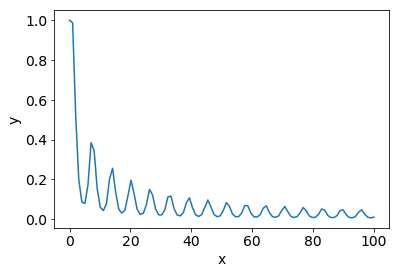

In [13]:
from scipy.integrate import odeint

# Define a function which calculates the derivative
def dy_dx(y, x):
    return y*np.cos(x + y)

xs = np.linspace(0,100,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

-------

# Instrucciones:

* **Importante, Asegúrese de responder TODO lo que la pregunta pide.**
* La estructura de la tarea es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Responder cada pregunta de forma personal.
     5. Referencias. Es muy importante incluir todas las fuentes usadas, de otra forma se considera que lo no se ha citado adecuadamente es su trabajo.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`) entregado.
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `Matplotlib` y `ipywidgets`, entre otras, así como la **correcta implementación de algoritmos vectorizados**.
* **MUY IMPORTANTE** El archivo de entrega debe denominarse TareaN-rol.tar.gz y _notebook_ debe tener como nombre TareaN-rol.ipynb, donde $N$ es el número de la tarea y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante. El no cumplimiento de esta regla significa calificación $0$.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* Debe citar toda fuente de código externo. 
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

# Anexo: Pregunta Bonus <span style="color:blue"> **30 puntos**</span> 

_Los Avengers_, mientras ud. desarrollaba su solución propuesta, han estado trabajando arduamente en paralelo en un nuevo método de búsqueda de raíces que les pueda ser de ayuda.

En particular, han desarrollado un método basado en el Método de la Secante. 
Sin embargo, en lugar de buscar aproximaciones de la raíz mediante secantes trazadas desde 2 _initial guess_, **se proyecta una parábola a partir de 3 _puntos iniciales dados_**.

Para ello, se define una parábola de una forma conveniente, a partir de tres puntos $(x_0, f(x_0)), (x_1, f(x_1)),  (x_2, f(x_2))$:
\begin{align*}
f(x) = a(x - x_2)^2 + b(x - x_2) + c.
\end{align*}

Luego, se obtienen los coeficientes $a, b, c$ a partir de los 3 puntos indicados. 
Una vez definida la parábola, se elige el punto $x_3$ como **la intersección de la parábola con el eje x más cercana a $x_2$**.
A partir de $x_3$, su correspondiente $f(x_3)$ y **junto a dos puntos previos más cercanos a él** se construye una nueva parábola y se continua de la misma forma. A continuación se presenta un _sketch_ gráfico referente al método ($r$ corresponse a la aproximación de la raíz $root$), obtenida desde la parábola construida con $x_0$, $x_1$ y $x_2$.

<img src="parabola.png" style="width:50%">

Se sugiere además _poner especial cuidado a la pérdida de significancia en este algoritmo._

## B.1. Implementación

Resuelva el problema de graficar la EDO anteriormente descrita, pero esta vez utilize este algoritmo para resolver la secuencia de problemas de busqueda de raíces. Implemente el algoritmo bajo las mismas condiciones de presupuesto de operaciones elementales. Comparelo con los algoritmos anteriores y explique claramente sus ventajas y desventajas. Se sugiere modificar la función ```python plot_solutions_of_ODE ``` para incluir ```python avengers_ode_solver``` si decide libremente aceptar realizar el bonus.

```python
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def avengers_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    ...
    return y
```

# Referencias

$[1]$: [Notebook oficial del curso](https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb) (3 de Abril 2019)

$[2]$: [Documentación numpy.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) (2 de Abril 2019)

$[3]$: [Solving Differential Equations with ODEINT](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) (2 de Abril 2019)